### Forecasting Time series Example 1.3
We study the AR(3) process
$$
X_n = 0.5 X_{n-1} - 0.5 X_{n-2} - 0.1 X_{n-3} + W_n
$$
We compute the absolute values of the roots of the characteristic polynomial 
$$\Phi(x) = 1 - 0.5 x + 0.5 x^2 + 0.1 x^3$$
with the following command

In [1]:
import numpy as np

# note order: p[0] * x**n + p[1] * x**(n-1) + ... + p[n-1]*x + p[n]
abs_roots = abs(np.roots([0.1, 0.5, -0.5, 1]))
print(abs_roots)

[6.09052833 1.28136399 1.28136399]


We can see that all the values are larger than $1$ and hence the process is stationary. We can simulate a time series from this model with the `arima_process.ArmaProcess()` method from `statsmodels.tsa`.

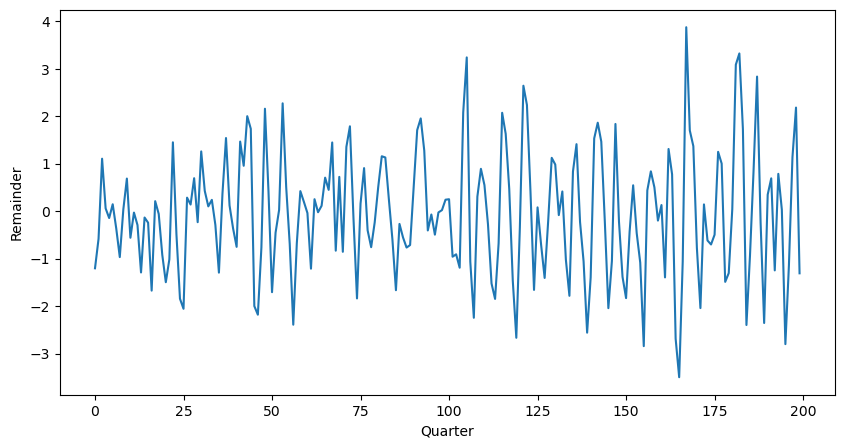

In [2]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess

# Simulate time series using ArmaProcess
ar3 = [1, -0.5, 0.5, 0.1]
simulated_data = ArmaProcess(ar3, ma=[1])
simulated_data = simulated_data.generate_sample(nsample=200)

# plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(simulated_data)
plt.xlabel("Quarter")
plt.ylabel("Remainder")

plt.show()

The figure shows an AR(3) realization of the code above. 

### Forecasting Time series Example 1.5
We study the AR(3) process. The process is defined by the coefficients $a_1 = 0.5$, $a_2= -0.5$ and $a_3 = -0.1$. We use `ArmaProcess()` to simulate the data, and `.acf()` to find the autocorrelation function.

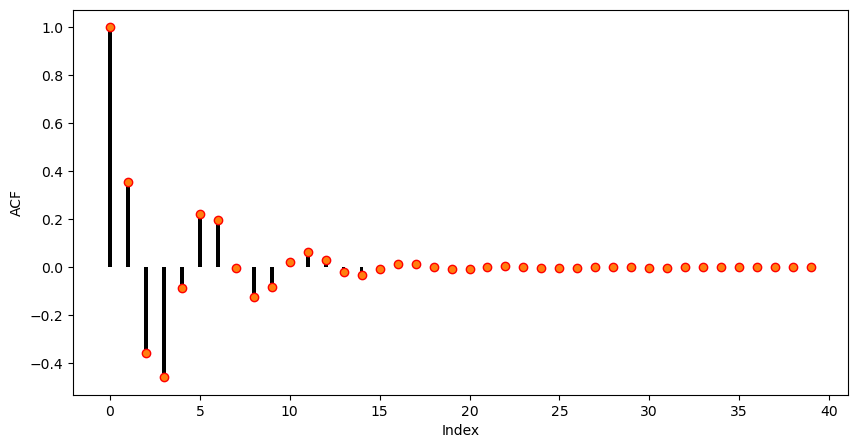

In [3]:
# Compute the theoretical autocorrelation function
lag = 40
acf_theor = ArmaProcess(ar = ar3)
acf_theor = acf_theor.acf(lag)

# Plot
x = np.arange(lag)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
plt.bar(x, acf_theor, width=0.2, color="black")
plt.plot(x, acf_theor, "ro", markerfacecolor="C1")
plt.xlabel("Index")
plt.ylabel("ACF")

plt.show()

As it can be seen the autocorrelation of the given AR(3) is oscillating and decreasing essentially following an exponential function. This is the typical autocorrelation behaviour of an autoregressive process.

### Forecasting Time series Example 1.6
We consider the time series generated from an AR(3) process. 

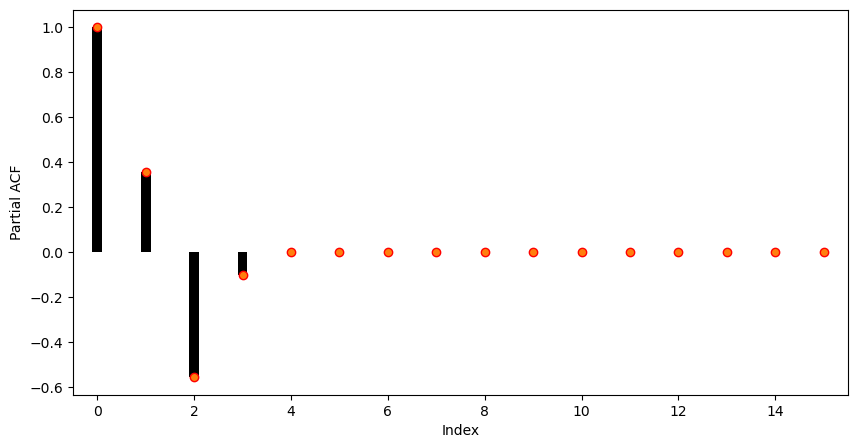

In [4]:
# Compute the partial autocorrelation function
pacf_theor = ArmaProcess(ar=ar3)
pacf_theor = pacf_theor.pacf(lag)

# Plot
x = np.arange(lag)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.bar(x, pacf_theor, width=0.2, color="black")
ax.plot(x, pacf_theor, "ro", markerfacecolor="C1")
ax.set_xlim([-0.5, 15.5])
plt.xlabel("Index")
plt.ylabel("Partial ACF")
plt.show()

As it can be seen, the partial autocorrelation coefficients larger than $3$ are almost zero. So in practice, i.e. when only the time series is at hand, we would 
choose an autoregressive model of order $3$ for modelling the present sequence. 